# Gabor and Log-Gabor functions
Notebook used for testing and experiments.  
By: Cristiano Fraga Guimarães Nunes.  
E-mail: cfgnunes@gmail.com

Important papers: [[1]](#paper001), [[2]](#paper002), [[3]](#paper003), [[4]](#paper004) and [[5]](#paper005).  
Interesting notes from professor Peter Kovesi: http://www.peterkovesi.com/matlabfns/PhaseCongruency/Docs/convexpl.html

---

In [1]:
import cv2
import numpy as np
import platform

import util.plotfunctions as pf
import util.gaborfunctions as gf

The versions of each library used are displayed below:

In [2]:
print("Python version: %s " % platform.python_version())
print("OpenCV version: %s " % cv2.__version__)

Python version: 3.5.4rc1 
OpenCV version: 3.4.1 


---
## Example: Gabor filter kernel

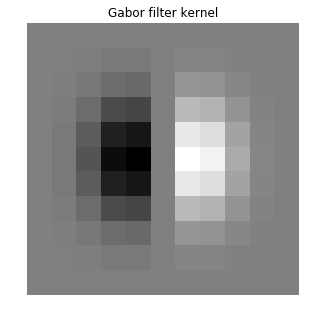

In [3]:
ksize = (11, 11)
sigma = 1.6
theta = np.pi
lambd = 10
gamma = 1.0
psi = np.pi * 0.5

gabor_kernel = gf.get_gabor_kernel(ksize, sigma, theta, lambd, gamma, psi)

pf.plot_image_list([gabor_kernel], ["Gabor filter kernel"], scale_factor=5)

---
## Example: Gabor filter bank

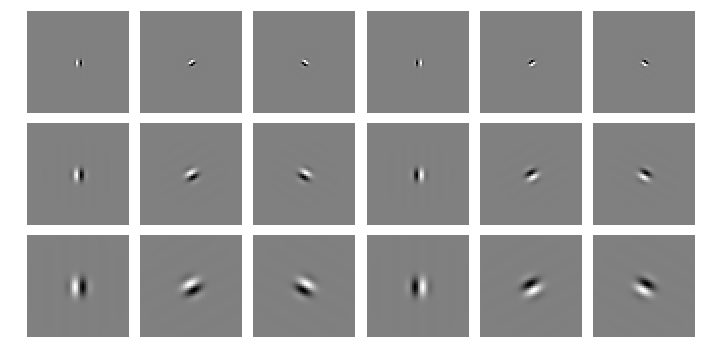

In [4]:
ksize = (50, 50)
nscales = 3
norientations = 6
min_sigma = 1.0
scale_factor = 3

gabor_filterbank = gf.get_gabor_filterbank(ksize, nscales, norientations, min_sigma, scale_factor)

pf.plot_image_list(gabor_filterbank, ncols=norientations, scale_factor=2)

---
## Example: Log-Gabor filter kernel

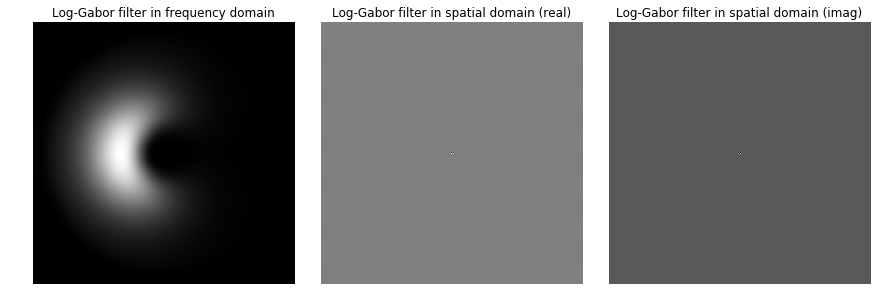

In [5]:
ksize = (800, 640)
ksize = (512, 512)
min_wavelength = 3.0
scale = 1
scale_factor = 2.0
sigma_over_f = 0.65
theta0 = np.pi
sigma_theta0 = 1.0

wavelength = min_wavelength * scale_factor ** scale
f0 = 1.0 / wavelength

loggabor_kernel = gf.get_log_gabor_kernel(ksize, f0, theta0, sigma_over_f, sigma_theta0)

# Calculates the FFT
image_dft = cv2.dft(loggabor_kernel, flags=cv2.DFT_COMPLEX_OUTPUT)
image_dft_shift = np.fft.fftshift(image_dft)

image_list = []
image_list.append(loggabor_kernel)
image_list.append(image_dft_shift[:, :, 0])
image_list.append(image_dft_shift[:, :, 1])

title_list = []
title_list.append("Log-Gabor filter in frequency domain")
title_list.append("Log-Gabor filter in spatial domain (real)")
title_list.append("Log-Gabor filter in spatial domain (imag)")

pf.plot_image_list(image_list, title_list, ncols=3, scale_factor=5)

---
## Example: Log-Gabor filter bank

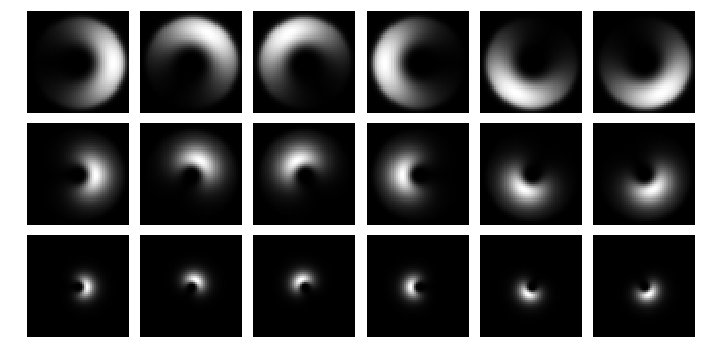

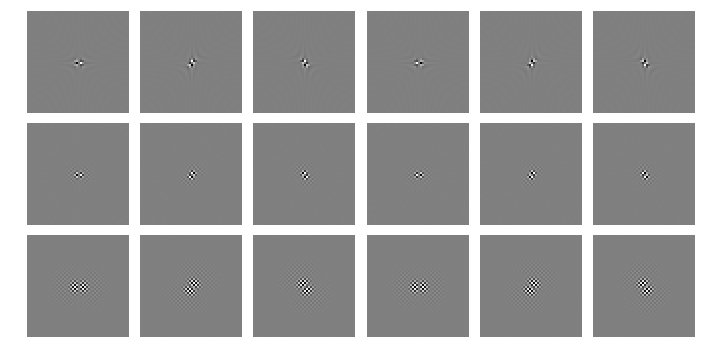

In [6]:
ksize = (50, 50)
nscales = 3
norientations = 6

loggabor_filterbank = gf.get_log_gabor_filterbank((50, 50), nscales, norientations, 3, 2, 0.65, 1)
loggabor_filterbank_spacial = []

for lg_filter in loggabor_filterbank:
    lg_filter_dft = cv2.dft(lg_filter, flags=cv2.DFT_COMPLEX_OUTPUT)
    lg_filter_dft_shift = np.fft.fftshift(lg_filter_dft)
    loggabor_filterbank_spacial.append(lg_filter_dft_shift[:, :, 0])

pf.plot_image_list(loggabor_filterbank, None, norientations, 2)
pf.plot_image_list(loggabor_filterbank_spacial, None, norientations, 2)

---
## Example: Gabor filter kernel in images

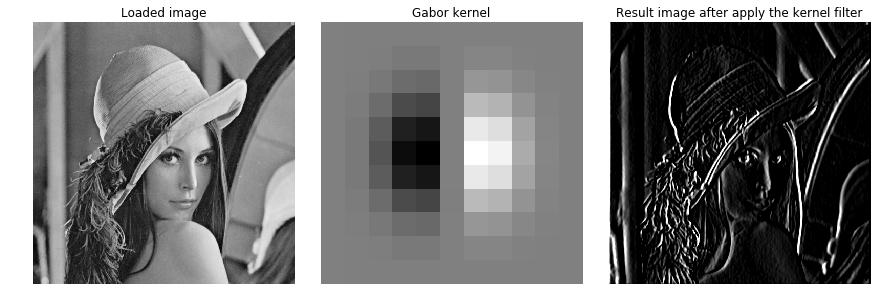

In [7]:
image = cv2.imread("images-sample/img1.ppm", cv2.IMREAD_GRAYSCALE)
image = cv2.imread("images-sample/lena.jpg", cv2.IMREAD_GRAYSCALE)

image_result_gabor = np.abs(cv2.filter2D(
    src=image,
    ddepth=-1,
    kernel=gabor_kernel,
    dst=0,
    anchor=(-1, -1),
    delta=0,
    borderType=cv2.BORDER_CONSTANT))

image_list = []
image_list.append(image)
image_list.append(gabor_kernel)
image_list.append(image_result_gabor)

title_list = []
title_list.append("Loaded image")
title_list.append("Gabor kernel")
title_list.append("Result image after apply the kernel filter")

pf.plot_image_list(image_list, title_list, ncols=4, scale_factor=5)

---
## Example: Log-Gabor filter kernel in images

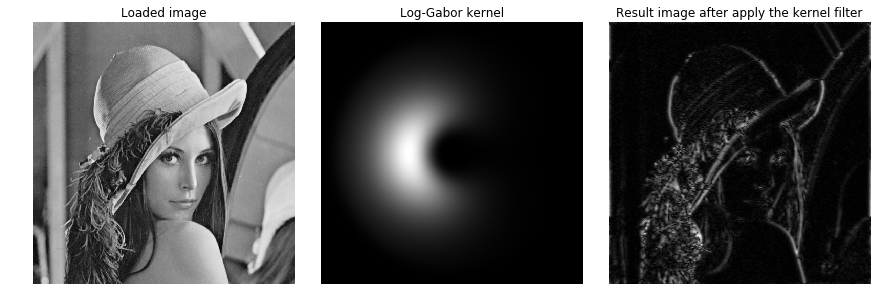

In [8]:
image = cv2.imread("images-sample/img1.ppm", cv2.IMREAD_GRAYSCALE)
image = cv2.imread("images-sample/lena.jpg", cv2.IMREAD_GRAYSCALE)
image = image.copy().astype(np.float)

image_f = np.fft.fft2(image)
image_edge_f = image_f * np.fft.fftshift(loggabor_kernel)
image_back = np.fft.ifft2(image_edge_f)

image_back = np.abs(image_back)

image_list = []
image_list.append(image)
image_list.append(loggabor_kernel)
image_list.append(image_back)

title_list = []
title_list.append("Loaded image")
title_list.append("Log-Gabor kernel")
title_list.append("Result image after apply the kernel filter")

pf.plot_image_list(image_list, title_list, ncols=4, scale_factor=5)

---
## References

Gabor:

<a id='paper001'>[1]</a> Gabor, Dennis. "Theory of communication. Part 1: The analysis of information." Journal of the Institution of Electrical Engineers-Part III: Radio and Communication Engineering 93.26 (1946): 429-441. http://digital-library.theiet.org/content/journals/10.1049/ji-3-2.1946.0074

<a id='paper002'>[2]</a> Fogel, Itzhak, and Dov Sagi. "Gabor filters as texture discriminator." Biological cybernetics 61.2 (1989): 103-113. https://link.springer.com/article/10.1007/BF00204594

Log-Gabor:

<a id='paper003'>[3]</a> Zhitao, Xiao, et al. "Research on log Gabor wavelet and its application in image edge detection." Signal Processing, 2002 6th International Conference on. Vol. 1. IEEE, 2002. https://ieeexplore.ieee.org/abstract/document/1181125/

<a id='paper004'>[4]</a> Kovesi, Peter. "Image features from phase congruency." Videre: Journal of computer vision research 1.3 (1999): 1-26. http://ftp.cs.rochester.edu/~brown/Videre/001/articles/v1n3001.pdf

<a id='paper006'>[5]</a> Walia, Ekta, and Vishal Verma. "Boosting local texture descriptors with Log-Gabor filters response for improved image retrieval." International Journal of Multimedia Information Retrieval 5.3 (2016): 173-184. https://link.springer.com/article/10.1007/s13735-016-0099-2